# Using MobileNet

- This tutorial shows how to load a pretrained model and use it to make predictions.

- Before running this notebook run `plaidml-setup` in your terminal and select a device.


#### Selecting device for running computations
When running `plaidml-setup` a menu for setting a device should appear.

```
Multiple devices detected (You can override by setting PLAIDML_DEVICE_IDS).
Please choose a default device:

   1 : llvm_cpu.0
   2 : opencl_amd_amd_radeon_r9_m370x_compute_engine.0
   3 : opencl_intel_iris_pro.0
   4 : opencl_cpu.0
   5 : metal_amd_radeon_r9_m370x.0
   6 : metal_intel_iris_pro_graphics.0
   ```

In [1]:
import plaidml
import numpy as np 
import skimage
from skimage import transform
from skimage import io 
from matplotlib import pyplot as plt
%matplotlib inline

(326, 600, 3)


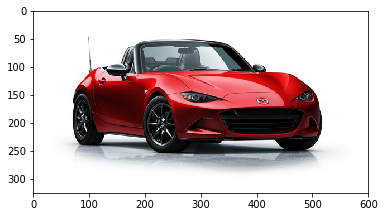

In [2]:
### Load image
im = io.imread('images/car.jpg')
plt.imshow(im)
print(im.shape)

### Load mapping from integer to textual description
s = open("imagenet_class_descriptions.txt", 'r').read()
label_to_text = eval(s)

In [3]:
list(label_to_text.values())[0:5]

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark']

In [4]:
import plaidml.keras
plaidml.keras.install_backend()
from keras import applications

base_model = applications.MobileNet()

/Users/david.buchaca/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:plaidml:Opening device "metal_amd_radeon_r9_m370x.0"


17227776/17225924 [==============================] - 2s 0us/step


In [5]:
base_model.input

<tile.Value input_1 Placeholder FLOAT32(<tile.Value SymbolicDim UINT64()>, 224, 224, 3)>

/Users/david.buchaca/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


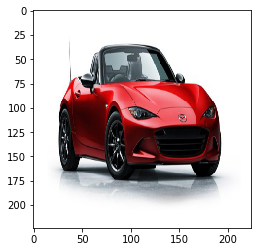

In [6]:
# need to resize the image 
im_resize = skimage.transform.resize(im,(224,224,3))
plt.imshow(im_resize)

In [7]:
im_resize_reshape = im_resize.reshape(1,224, 224, 3)

In [8]:
%time y_hat = base_model.predict(im_resize_reshape).argmax()

CPU times: user 579 ms, sys: 32.8 ms, total: 612 ms
Wall time: 616 ms


In [9]:
label_to_text[y_hat]

'sports car, sport car'

/Users/david.buchaca/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


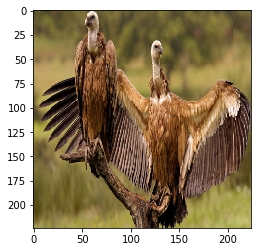

In [10]:
im = io.imread('images/vultures.jpg')
im_resize = skimage.transform.resize(im,(224,224,3))
plt.imshow(im_resize)
im_resize_reshape = im_resize.reshape(1,224, 224, 3)

In [11]:
%time y_hat = base_model.predict(im_resize_reshape).argmax()

CPU times: user 8.43 ms, sys: 11.8 ms, total: 20.2 ms
Wall time: 30.9 ms


In [12]:
label_to_text[y_hat]

'vulture'